In [ ]:
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import lazyqsar as lq
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
current_directory = os.path.dirname(__file__)
filename = os.path.join(current_directory, "..", "Data", "My_data", "Final_processed.csv")
df = pd.read_csv(filename)
df

SMILES  Active
0    COc1c(N2C[C@@H]3CCCN[C@@H]3C2)c(F)cc2c(=O)c(C(...       1
1    C=CC1=C(C(=O)O)N2C(=O)[C@H]([C@H]2SC1)NC(=O)/C...       1
2           CC(=O)NC1=CC=C(C=C1)C2=CSC(=N2)C3=CN=CC=C3       0
3    CC(=O)NCC(=O)N[C@@H](CC1=CC=CC=C1)C(=O)NC2(CCC...       0
4    CC(=O)NCC(=O)N[C@@H](CC1=CC=CC=C1)C(=O)NC2(CCC...       0
..                                                 ...     ...
260  CC[C@@H]1[C@](C)([C@@H]([C@@H](C)C(=O)[C@H](C)...       1
261  CC[C@@H]1[C@](C)([C@@H]([C@@H](C)N(C)C[C@H](C)...       0
262  C[C@@H]1CC(=O)[C@H](O)O[C@@H]([C@H]([C@@H]([C@...       0
263   C1CC1N2C=C(C(=O)C3=C2C=C(C(=C3)F)N4CCNCC4)C(=O)O       0
264  COC1=CC=C(/C=C\C2=CC(=C(C(=C2)I)OC)I)C=C1OP(=O...       0

[265 rows x 2 columns]

In [6]:
SMILES = "SMILES"
ACTIVE = "Active"

In [7]:
import matplotlib.pyplot as plt
x = df[ACTIVE]
print(x)

0      1
1      1
2      0
3      0
4      0
      ..
260    1
261    0
262    0
263    0
264    0
Name: Active, Length: 265, dtype: int64


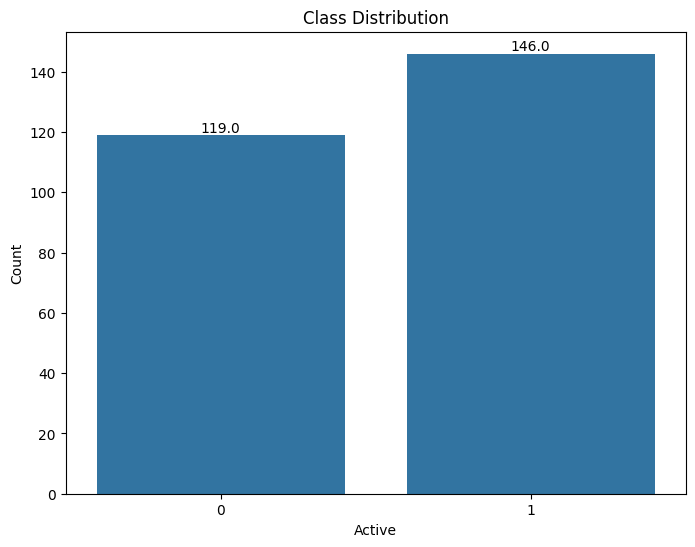

1    146
0    119
Name: Active, dtype: int64


In [8]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=x, data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xlabel('Active')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

activity_counts = df['Active'].value_counts()
print(activity_counts)

In [10]:
mols = [Chem.MolFromSmiles(x) for x in df['SMILES']]

# Filter out None molecules
valid_mols = [mol for mol in mols if mol is not None]
# Create molecules from SMILES
df['Molecule'] = mols
# Remove rows where the molecule is None
df = df.dropna(subset=['Molecule'])
# Drop the temporary 'Molecule' column
df = df.drop(columns=['Molecule'])

df.to_csv('Data.csv', index=False)

In [61]:
current_directory = os.path.dirname(__file__)
filename = os.path.join(current_directory, "..", "Data", "My_data", "Data.csv")
Data = pd.read_csv(filename)

In [12]:
desc = Data['SMILES']
y = Data['Active']

In [13]:
y = np.array(y)

#  Training with Train-test Split

# **Morgan BinaryClassifier_60**

Streaming output truncated to the last 5000 lines.
[flaml.automl.logger: 01-19 09:59:28] {2391} INFO -  at 5.5s,	estimator rf's best error=0.0364,	best estimator rf's best error=0.0364
[flaml.automl.logger: 01-19 09:59:28] {2218} INFO - iteration 20, current learner rf
[flaml.automl.logger: 01-19 09:59:28] {2391} INFO -  at 5.9s,	estimator rf's best error=0.0364,	best estimator rf's best error=0.0364
[flaml.automl.logger: 01-19 09:59:28] {2218} INFO - iteration 21, current learner rf
[flaml.automl.logger: 01-19 09:59:28] {2391} INFO -  at 6.1s,	estimator rf's best error=0.0091,	best estimator rf's best error=0.0091
[flaml.automl.logger: 01-19 09:59:28] {2218} INFO - iteration 22, current learner rf
[flaml.automl.logger: 01-19 09:59:28] {2391} INFO -  at 6.2s,	estimator rf's best error=0.0091,	best estimator rf's best error=0.0091
[flaml.automl.logger: 01-19 09:59:28] {2218} INFO - iteration 23, current learner lgbm
[flaml.automl.logger: 01-19 09:59:28] {2391} INFO -  at 6.2s,	estimator

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


[flaml.automl.logger: 01-19 10:03:25] {2391} INFO -  at 0.1s,	estimator lgbm's best error=0.2000,	best estimator lgbm's best error=0.2000
[flaml.automl.logger: 01-19 10:03:25] {2218} INFO - iteration 2, current learner xgboost
[flaml.automl.logger: 01-19 10:03:25] {2391} INFO -  at 0.2s,	estimator xgboost's best error=0.2000,	best estimator lgbm's best error=0.2000
[flaml.automl.logger: 01-19 10:03:25] {2218} INFO - iteration 3, current learner rf
[flaml.automl.logger: 01-19 10:03:25] {2391} INFO -  at 0.3s,	estimator rf's best error=0.2727,	best estimator lgbm's best error=0.2000
[flaml.automl.logger: 01-19 10:03:25] {2218} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 01-19 10:03:25] {2391} INFO -  at 0.3s,	estimator lgbm's best error=0.2000,	best estimator lgbm's best error=0.2000
[flaml.automl.logger: 01-19 10:03:25] {2218} INFO - iteration 5, current learner rf
[flaml.automl.logger: 01-19 10:03:25] {2391} INFO -  at 0.4s,	estimator rf's best error=0.1773,	best est

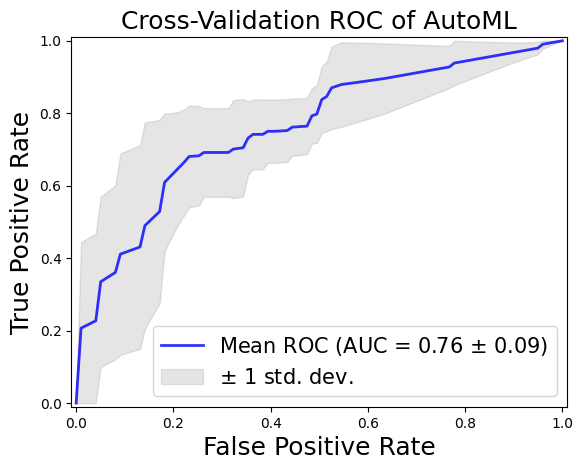

In [14]:
# Assuming 'desc' and 'y' are your input data
# Initialize AutoML for classification task
model = lq.MorganBinaryClassifier(time_budget_sec=60, estimator_list=["rf", "lgbm", "xgboost"])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
all_true_labels = []
all_predictions = []

for i, (train, test) in enumerate(cv.split(desc, y)):
    model.fit(desc.iloc[train], y[train])
    y_hat_proba = model.predict_proba(desc.iloc[test])[:, 1]

    fpr, tpr, thresholds = roc_curve(y[test], y_hat_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # Classification report
    y_pred = model.predict(desc.iloc[test])
    print(f"\nClassification Report for Fold {i}:\n")
    print(classification_report(y[test], y_pred))

    # Accumulate true labels and predictions
    all_true_labels.extend(y[test])
    all_predictions.extend(y_pred)

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of AutoML', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

-------- MorganBinaryClassifier_60 Confusion Matrix --------


Text(50.722222222222214, 0.5, 'Real')

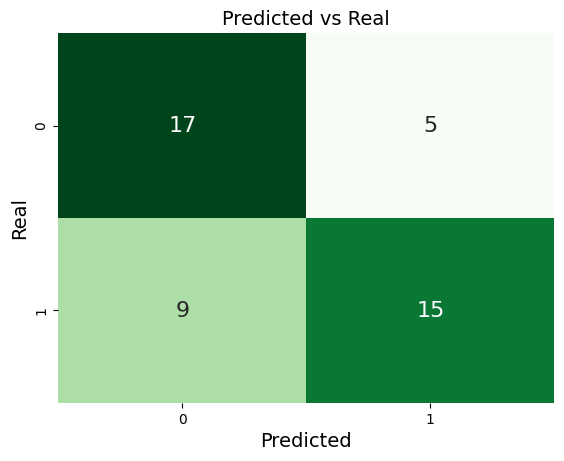

In [16]:
# Confusion Matrix
model_name = 'MorganBinaryClassifier_60'
print(f"-------- {model_name} Confusion Matrix --------")
conf_mat =  confusion_matrix(y[test], y_pred)
ax = sns.heatmap(conf_mat, annot=True, cmap='Greens', cbar=False, annot_kws={"size": 16})
ax.set_title("Predicted vs Real", fontsize=14)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('Real', fontsize=14)

In [18]:
model.save("model_morgan60.joblib")

# **MorganBinaryClassifier_600**

Streaming output truncated to the last 5000 lines.
[flaml.automl.logger: 01-19 10:39:46] {2391} INFO -  at 165.8s,	estimator lgbm's best error=0.1611,	best estimator xgboost's best error=0.1555
[flaml.automl.logger: 01-19 10:39:46] {2218} INFO - iteration 517, current learner xgboost
[flaml.automl.logger: 01-19 10:39:46] {2391} INFO -  at 166.1s,	estimator xgboost's best error=0.1555,	best estimator xgboost's best error=0.1555
[flaml.automl.logger: 01-19 10:39:46] {2218} INFO - iteration 518, current learner lgbm
[flaml.automl.logger: 01-19 10:39:46] {2391} INFO -  at 166.3s,	estimator lgbm's best error=0.1611,	best estimator xgboost's best error=0.1555
[flaml.automl.logger: 01-19 10:39:46] {2218} INFO - iteration 519, current learner lgbm
[flaml.automl.logger: 01-19 10:39:46] {2391} INFO -  at 166.5s,	estimator lgbm's best error=0.1611,	best estimator xgboost's best error=0.1555
[flaml.automl.logger: 01-19 10:39:46] {2218} INFO - iteration 520, current learner lgbm
[flaml.automl.logge

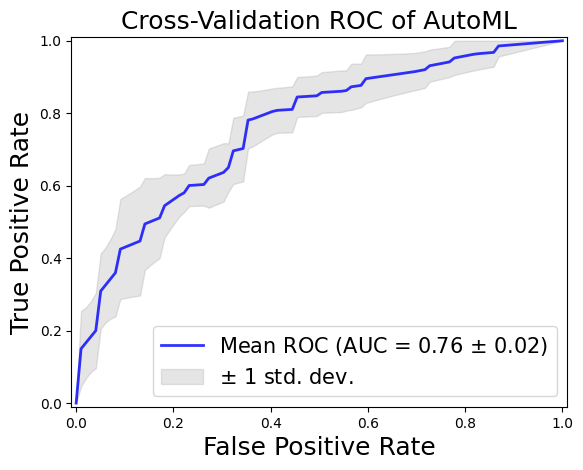

In [19]:
# Assuming 'desc' and 'y' are your input data
# Initialize AutoML for classification task
model = lq.MorganBinaryClassifier(time_budget_sec=600, estimator_list=["rf", "lgbm", "xgboost"])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
all_true_labels = []
all_predictions = []

for i, (train, test) in enumerate(cv.split(desc, y)):
    model.fit(desc.iloc[train], y[train])
    y_hat_proba = model.predict_proba(desc.iloc[test])[:, 1]

    fpr, tpr, thresholds = roc_curve(y[test], y_hat_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # Classification report
    y_pred = model.predict(desc.iloc[test])
    print(f"\nClassification Report for Fold {i}:\n")
    print(classification_report(y[test], y_pred))

    # Accumulate true labels and predictions
    all_true_labels.extend(y[test])
    all_predictions.extend(y_pred)

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of AutoML', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

-------- MorganBinaryClassifier_600 Confusion Matrix --------


Text(50.722222222222214, 0.5, 'Real')

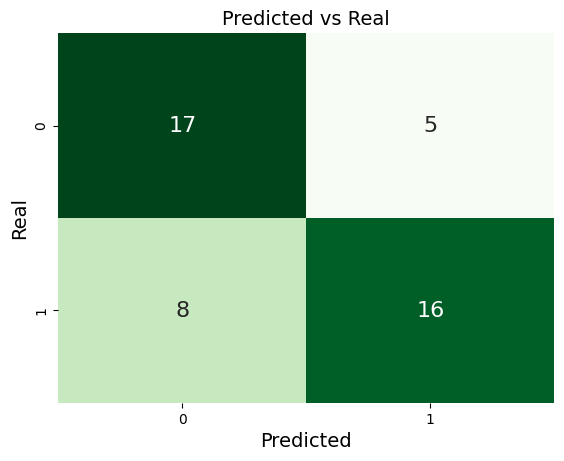

In [20]:
# Confusion Matrix
model_name = 'MorganBinaryClassifier_600'
print(f"-------- {model_name} Confusion Matrix --------")
conf_mat =  confusion_matrix(y[test], y_pred)
ax = sns.heatmap(conf_mat, annot=True, cmap='Greens', cbar=False, annot_kws={"size": 16})
ax.set_title("Predicted vs Real", fontsize=14)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('Real', fontsize=14)

In [22]:
model.save("model_morgan600.joblib")

# **ErsiliaBinaryClassifier_60**

[flaml.automl.logger: 01-19 10:57:32] {1679} INFO - task = classification
[flaml.automl.logger: 01-19 10:57:32] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 01-19 10:57:32] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 01-19 10:57:32] {1900} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm', 'xgboost']
[flaml.automl.logger: 01-19 10:57:32] {2218} INFO - iteration 0, current learner rf
[flaml.automl.logger: 01-19 10:57:33] {2344} INFO - Estimated sufficient time budget=307s. Estimated necessary time budget=0s.
[flaml.automl.logger: 01-19 10:57:33] {2391} INFO -  at 0.1s,	estimator rf's best error=0.0909,	best estimator rf's best error=0.0909
[flaml.automl.logger: 01-19 10:57:33] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 01-19 10:57:33] {2391} INFO -  at 0.2s,	estimator lgbm's best error=0.1545,	best estimator rf's best error=0.0909
[flaml.automl.logger: 01-19 10:57:33] {2218} INFO - iteration 2, current learner

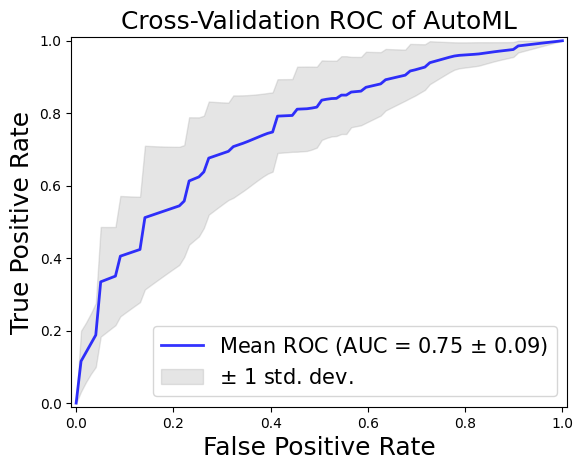

In [23]:
# Assuming 'desc' and 'y' are your input data
# Initialize AutoML for classification task
model = lq.ErsiliaBinaryClassifier(time_budget_sec=60, estimator_list=["rf", "lgbm", "xgboost"])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
all_true_labels = []
all_predictions = []

for i, (train, test) in enumerate(cv.split(desc, y)):
    model.fit(desc.iloc[train], y[train])
    y_hat_proba = model.predict_proba(desc.iloc[test])[:, 1]

    fpr, tpr, thresholds = roc_curve(y[test], y_hat_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # Classification report
    y_pred = model.predict(desc.iloc[test])
    print(f"\nClassification Report for Fold {i}:\n")
    print(classification_report(y[test], y_pred))

    # Accumulate true labels and predictions
    all_true_labels.extend(y[test])
    all_predictions.extend(y_pred)

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of AutoML', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

-------- MorganBinaryClassifier_600 Confusion Matrix --------


Text(50.722222222222214, 0.5, 'Real')

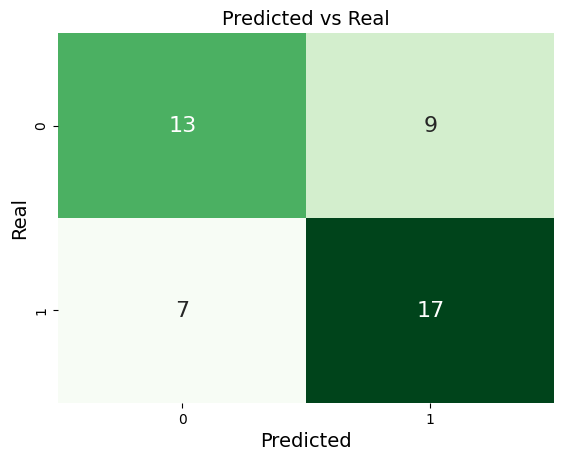

In [24]:
# Confusion Matrix
model_name = 'MorganBinaryClassifier_600'
print(f"-------- {model_name} Confusion Matrix --------")
conf_mat =  confusion_matrix(y[test], y_pred)
ax = sns.heatmap(conf_mat, annot=True, cmap='Greens', cbar=False, annot_kws={"size": 16})
ax.set_title("Predicted vs Real", fontsize=14)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('Real', fontsize=14)

In [25]:
model.save("model_eosce60.joblib")

# **ErsiliaBinaryClassifier_600**

Streaming output truncated to the last 5000 lines.
[flaml.automl.logger: 01-19 11:25:32] {2218} INFO - iteration 262, current learner lgbm
[flaml.automl.logger: 01-19 11:25:32] {2391} INFO -  at 132.2s,	estimator lgbm's best error=0.1747,	best estimator lgbm's best error=0.1747
[flaml.automl.logger: 01-19 11:25:32] {2218} INFO - iteration 263, current learner lgbm
[flaml.automl.logger: 01-19 11:25:33] {2391} INFO -  at 132.7s,	estimator lgbm's best error=0.1747,	best estimator lgbm's best error=0.1747
[flaml.automl.logger: 01-19 11:25:33] {2218} INFO - iteration 264, current learner lgbm
[flaml.automl.logger: 01-19 11:25:33] {2391} INFO -  at 133.3s,	estimator lgbm's best error=0.1747,	best estimator lgbm's best error=0.1747
[flaml.automl.logger: 01-19 11:25:33] {2218} INFO - iteration 265, current learner lgbm
[flaml.automl.logger: 01-19 11:25:34] {2391} INFO -  at 134.2s,	estimator lgbm's best error=0.1747,	best estimator lgbm's best error=0.1747
[flaml.automl.logger: 01-19 11:25:34]

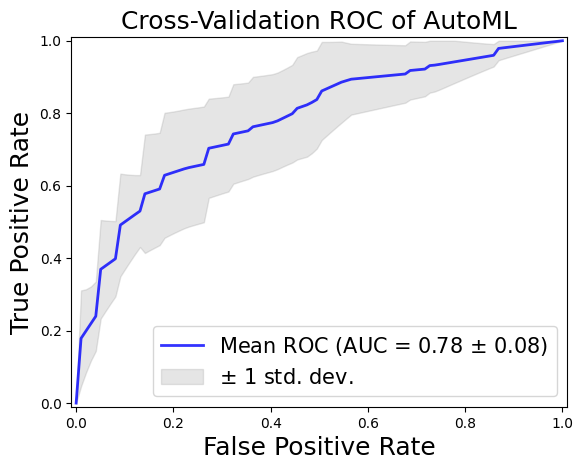

In [26]:
# Assuming 'desc' and 'y' are your input data
# Initialize AutoML for classification task
model = lq.ErsiliaBinaryClassifier(time_budget_sec=600, estimator_list=["rf", "lgbm", "xgboost"])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
all_true_labels = []
all_predictions = []

for i, (train, test) in enumerate(cv.split(desc, y)):
    model.fit(desc.iloc[train], y[train])
    y_hat_proba = model.predict_proba(desc.iloc[test])[:, 1]

    fpr, tpr, thresholds = roc_curve(y[test], y_hat_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # Classification report
    y_pred = model.predict(desc.iloc[test])
    print(f"\nClassification Report for Fold {i}:\n")
    print(classification_report(y[test], y_pred))

    # Accumulate true labels and predictions
    all_true_labels.extend(y[test])
    all_predictions.extend(y_pred)

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of AutoML', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

-------- ErsiliaBinaryClassifier_600 Confusion Matrix --------


Text(50.722222222222214, 0.5, 'Real')

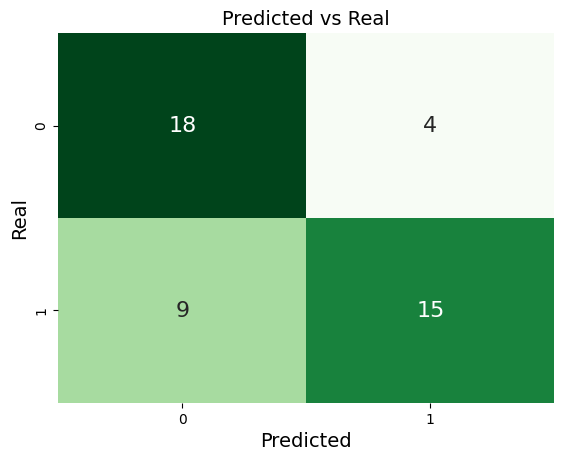

In [29]:
# Confusion Matrix
model_name = 'ErsiliaBinaryClassifier_600'
print(f"-------- {model_name} Confusion Matrix --------")
conf_mat =  confusion_matrix(y[test], y_pred)
ax = sns.heatmap(conf_mat, annot=True, cmap='Greens', cbar=False, annot_kws={"size": 16})
ax.set_title("Predicted vs Real", fontsize=14)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('Real', fontsize=14)

# **Training on the Entire data**

# **Morgan_Binary_60**

In [47]:
# Assuming Data is your original dataframe
# Define SMILES and EXP variables if not defined
SMILES = 'SMILES'
EXP = 'Active'

no_of_fold = 5
results = []

for i in range(no_of_fold):
    # Use the entire dataset for training
    train = Data

    # Separate features (SMILES) and target variable (EXP) for training
    smiles_train = train[SMILES]
    y_train = train[EXP]

    # Initialize and fit the model: Our best model was
    model = lq.MorganBinaryClassifier(time_budget_sec=60, estimator_list=["rf", "lgbm", "xgboost"])
    model.fit(smiles_train, y_train)

    # Separate features (SMILES) for testing (you can use the entire dataset or a different dataset for testing)
    smiles_test = Data[SMILES]

    # Predict probabilities using the trained model
    y_hat = model.predict_proba(smiles_test)

    # Store the results
    results.append(y_hat)

# Calculate the mean score
mean_score = np.mean(results, axis=0)
mean_score


Streaming output truncated to the last 5000 lines.
[flaml.automl.logger: 01-19 14:18:25] {2391} INFO -  at 56.8s,	estimator lgbm's best error=0.1603,	best estimator rf's best error=0.1186
[flaml.automl.logger: 01-19 14:18:25] {2218} INFO - iteration 628, current learner rf
[flaml.automl.logger: 01-19 14:18:25] {2391} INFO -  at 56.9s,	estimator rf's best error=0.1186,	best estimator rf's best error=0.1186
[flaml.automl.logger: 01-19 14:18:25] {2218} INFO - iteration 629, current learner lgbm
[flaml.automl.logger: 01-19 14:18:25] {2391} INFO -  at 57.0s,	estimator lgbm's best error=0.1603,	best estimator rf's best error=0.1186
[flaml.automl.logger: 01-19 14:18:25] {2218} INFO - iteration 630, current learner lgbm
[flaml.automl.logger: 01-19 14:18:26] {2391} INFO -  at 57.1s,	estimator lgbm's best error=0.1603,	best estimator rf's best error=0.1186
[flaml.automl.logger: 01-19 14:18:26] {2218} INFO - iteration 631, current learner lgbm
[flaml.automl.logger: 01-19 14:18:26] {2391} INFO -  

array([[0.6131813 , 0.3868187 ],
       [0.54921733, 0.45078267],
       [0.72656634, 0.27343366],
       [0.59164158, 0.40835842],
       [0.59164158, 0.40835842],
       [0.59164158, 0.40835842],
       [0.28990546, 0.71009454],
       [0.28990546, 0.71009454],
       [0.12128788, 0.87871212],
       [0.12128788, 0.87871212],
       [0.19204614, 0.80795386],
       [0.12128788, 0.87871212],
       [0.12128788, 0.87871212],
       [0.50482339, 0.49517661],
       [0.50482339, 0.49517661],
       [0.57848022, 0.42151978],
       [0.65885801, 0.34114199],
       [0.50482339, 0.49517661],
       [0.65885801, 0.34114199],
       [0.50482339, 0.49517661],
       [0.66032844, 0.33967156],
       [0.50482339, 0.49517661],
       [0.50482339, 0.49517661],
       [0.50482339, 0.49517661],
       [0.66032844, 0.33967156],
       [0.50482339, 0.49517661],
       [0.50482339, 0.49517661],
       [0.51451626, 0.48548374],
       [0.65885801, 0.34114199],
       [0.50482339, 0.49517661],
       [0.

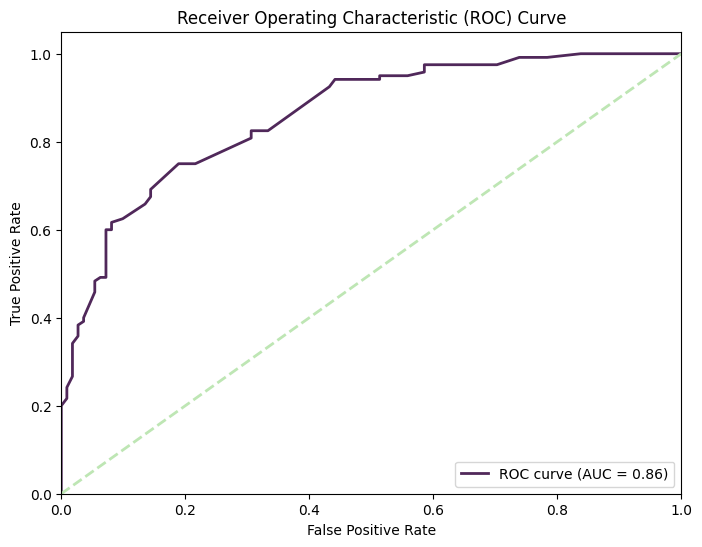

In [49]:
# We need the real results, the activity of the test set
y_test = Data['Active']

# We use the sklearn package to calculate the roc_curve and plot it
y_hat = y_hat[:,1]
fpr, tpr, _ = roc_curve(y_test, y_hat)
auroc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#50285a', lw=2, label=f'ROC curve (AUC = {auroc:.2f})')
plt.plot([0, 1], [0, 1], color='#bee6b4', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

[Text(0, 0.5, 'Inactive'), Text(0, 1.5, 'Active')]

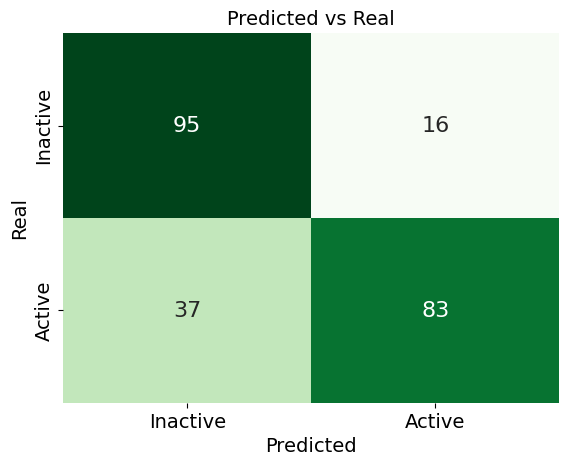

In [50]:
proba_cutoff = 0.5
y_hat_bin = [1 if x >= proba_cutoff else 0 for x in y_hat]


cf_matrix = confusion_matrix(y_test, y_hat_bin)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens', cbar=False, annot_kws={"size": 16})
ax.set_title("Predicted vs Real", fontsize=14)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('Real', fontsize=14)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Inactive','Active'], fontsize=14)
ax.yaxis.set_ticklabels(['Inactive','Active'], fontsize=14)

In [51]:
model.save("model_binary_full60.joblib")

# **Ersilia_Binary_60**

In [52]:
# Assuming Data is your original dataframe
# Define SMILES and EXP variables if not defined
SMILES = 'SMILES'
EXP = 'Active'

no_of_fold = 5
results = []

for i in range(no_of_fold):
    # Use the entire dataset for training
    train = Data

    # Separate features (SMILES) and target variable (EXP) for training
    smiles_train = train[SMILES]
    y_train = train[EXP]

    # Initialize and fit the model: Our best model was
    model = lq.ErsiliaBinaryClassifier(time_budget_sec=60, estimator_list=["rf", "lgbm", "xgboost"])
    model.fit(smiles_train, y_train)

    # Separate features (SMILES) for testing (you can use the entire dataset or a different dataset for testing)
    smiles_test = Data[SMILES]

    # Predict probabilities using the trained model
    y_hat = model.predict_proba(smiles_test)

    # Store the results
    results.append(y_hat)

# Calculate the mean score
mean_score = np.mean(results, axis=0)
mean_score


[flaml.automl.logger: 01-19 14:27:55] {1679} INFO - task = classification
[flaml.automl.logger: 01-19 14:27:55] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 01-19 14:27:55] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 01-19 14:27:55] {1900} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm', 'xgboost']
[flaml.automl.logger: 01-19 14:27:55] {2218} INFO - iteration 0, current learner rf
[flaml.automl.logger: 01-19 14:27:55] {2344} INFO - Estimated sufficient time budget=619s. Estimated necessary time budget=1s.
[flaml.automl.logger: 01-19 14:27:55] {2391} INFO -  at 0.1s,	estimator rf's best error=0.2981,	best estimator rf's best error=0.2981
[flaml.automl.logger: 01-19 14:27:55] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 01-19 14:27:55] {2391} INFO -  at 0.5s,	estimator lgbm's best error=0.2532,	best estimator lgbm's best error=0.2532
[flaml.automl.logger: 01-19 14:27:55] {2218} INFO - iteration 2, current learn

array([[0.10978046, 0.89021954],
       [0.21168522, 0.78831478],
       [0.91183552, 0.08816448],
       [0.59525508, 0.40474492],
       [0.15741223, 0.84258777],
       [0.74553998, 0.25446002],
       [0.15741223, 0.84258777],
       [0.15741223, 0.84258777],
       [0.15741223, 0.84258777],
       [0.15741223, 0.84258777],
       [0.15741223, 0.84258777],
       [0.15741223, 0.84258777],
       [0.28926764, 0.71073236],
       [0.73200517, 0.26799483],
       [0.62456927, 0.37543073],
       [0.77485417, 0.22514583],
       [0.62456927, 0.37543073],
       [0.62456927, 0.37543073],
       [0.62456927, 0.37543073],
       [0.59478503, 0.40521497],
       [0.62433048, 0.37566952],
       [0.48036195, 0.51963805],
       [0.48036195, 0.51963805],
       [0.48036195, 0.51963805],
       [0.66019231, 0.33980769],
       [0.48036195, 0.51963805],
       [0.50990741, 0.49009259],
       [0.66019231, 0.33980769],
       [0.73808275, 0.26191725],
       [0.66019231, 0.33980769],
       [0.

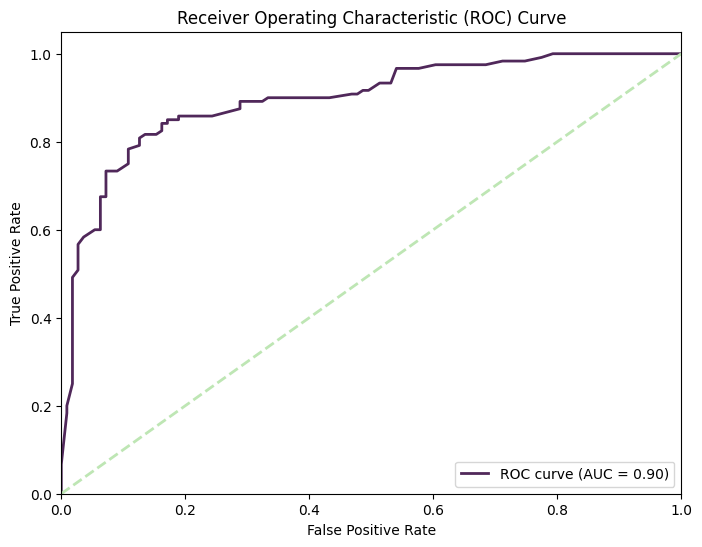

In [53]:
# We need the real results, the activity of the test set
y_test = Data['Active']

# We use the sklearn package to calculate the roc_curve and plot it
y_hat = y_hat[:,1]
fpr, tpr, _ = roc_curve(y_test, y_hat)
auroc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#50285a', lw=2, label=f'ROC curve (AUC = {auroc:.2f})')
plt.plot([0, 1], [0, 1], color='#bee6b4', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

[Text(0, 0.5, 'Inactive'), Text(0, 1.5, 'Active')]

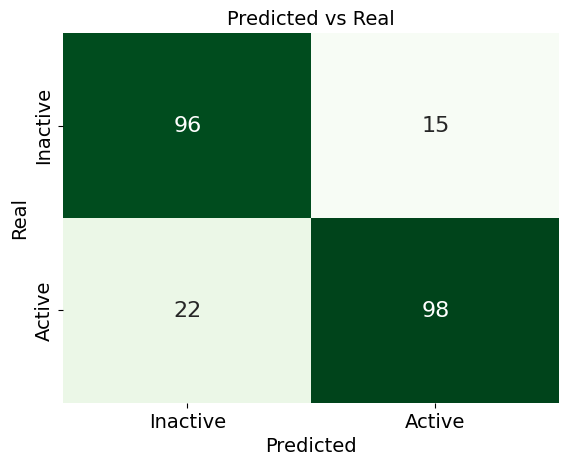

In [54]:
proba_cutoff = 0.5
y_hat_bin = [1 if x >= proba_cutoff else 0 for x in y_hat]


cf_matrix = confusion_matrix(y_test, y_hat_bin)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens', cbar=False, annot_kws={"size": 16})
ax.set_title("Predicted vs Real", fontsize=14)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('Real', fontsize=14)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Inactive','Active'], fontsize=14)
ax.yaxis.set_ticklabels(['Inactive','Active'], fontsize=14)

In [55]:
model.save("model_binary_eosce60.joblib")

# **Morgan_Binary_full_600**

In [56]:
# Assuming Data is your original dataframe
# Define SMILES and EXP variables if not defined
SMILES = 'SMILES'
EXP = 'Active'

no_of_fold = 5
results = []

for i in range(no_of_fold):
    # Use the entire dataset for training
    train = Data

    # Separate features (SMILES) and target variable (EXP) for training
    smiles_train = train[SMILES]
    y_train = train[EXP]

    # Initialize and fit the model: Our best model was
    model = lq.MorganBinaryClassifier(time_budget_sec=600, estimator_list=["rf", "lgbm", "xgboost"])
    model.fit(smiles_train, y_train)

    # Separate features (SMILES) for testing (you can use the entire dataset or a different dataset for testing)
    smiles_test = Data[SMILES]

    # Predict probabilities using the trained model
    y_hat = model.predict_proba(smiles_test)

    # Store the results
    results.append(y_hat)

# Calculate the mean score
mean_score = np.mean(results, axis=0)
mean_score


Streaming output truncated to the last 5000 lines.
[flaml.automl.logger: 01-19 15:02:46] {2391} INFO -  at 418.8s,	estimator lgbm's best error=0.1413,	best estimator xgboost's best error=0.1412
[flaml.automl.logger: 01-19 15:02:46] {2218} INFO - iteration 783, current learner xgboost
[flaml.automl.logger: 01-19 15:02:47] {2391} INFO -  at 419.5s,	estimator xgboost's best error=0.1412,	best estimator xgboost's best error=0.1412
[flaml.automl.logger: 01-19 15:02:47] {2218} INFO - iteration 784, current learner xgboost
[flaml.automl.logger: 01-19 15:02:48] {2391} INFO -  at 419.9s,	estimator xgboost's best error=0.1412,	best estimator xgboost's best error=0.1412
[flaml.automl.logger: 01-19 15:02:48] {2218} INFO - iteration 785, current learner lgbm
[flaml.automl.logger: 01-19 15:02:48] {2391} INFO -  at 420.3s,	estimator lgbm's best error=0.1413,	best estimator xgboost's best error=0.1412
[flaml.automl.logger: 01-19 15:02:48] {2218} INFO - iteration 786, current learner xgboost
[flaml.aut

array([[0.02720296, 0.97279704],
       [0.02706701, 0.972933  ],
       [0.9666008 , 0.0333992 ],
       [0.9530121 , 0.0469879 ],
       [0.9448751 , 0.05512484],
       [0.9106556 , 0.08934437],
       [0.03421181, 0.9657882 ],
       [0.04841036, 0.9515897 ],
       [0.07013893, 0.92986107],
       [0.07013893, 0.92986107],
       [0.03421181, 0.9657882 ],
       [0.0759508 , 0.9240492 ],
       [0.03845346, 0.96154654],
       [0.8986541 , 0.10134588],
       [0.8986541 , 0.10134588],
       [0.97080314, 0.02919681],
       [0.97093505, 0.02906491],
       [0.9623806 , 0.03761942],
       [0.9708845 , 0.02911544],
       [0.06835705, 0.9316429 ],
       [0.97138155, 0.02861844],
       [0.04526025, 0.95473975],
       [0.03509969, 0.9649003 ],
       [0.03509969, 0.9649003 ],
       [0.9039286 , 0.0960715 ],
       [0.03509969, 0.9649003 ],
       [0.04319501, 0.95680505],
       [0.9716015 , 0.02839852],
       [0.9709281 , 0.02907189],
       [0.1012367 , 0.8987633 ],
       [0.

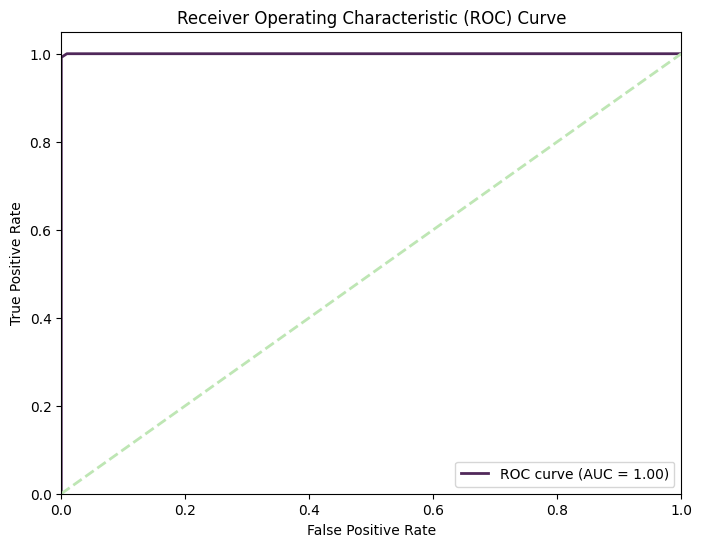

In [57]:
# We need the real results, the activity of the test set
y_test = Data['Active']

# We use the sklearn package to calculate the roc_curve and plot it
y_hat = y_hat[:,1]
fpr, tpr, _ = roc_curve(y_test, y_hat)
auroc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#50285a', lw=2, label=f'ROC curve (AUC = {auroc:.2f})')
plt.plot([0, 1], [0, 1], color='#bee6b4', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

[Text(0, 0.5, 'Inactive'), Text(0, 1.5, 'Active')]

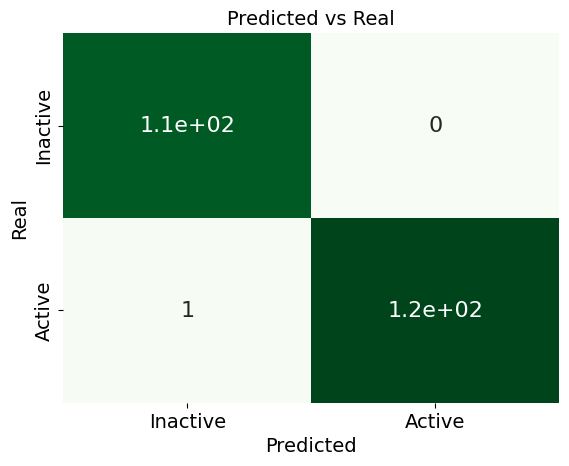

In [58]:
proba_cutoff = 0.5
y_hat_bin = [1 if x >= proba_cutoff else 0 for x in y_hat]


cf_matrix = confusion_matrix(y_test, y_hat_bin)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens', cbar=False, annot_kws={"size": 16})
ax.set_title("Predicted vs Real", fontsize=14)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('Real', fontsize=14)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Inactive','Active'], fontsize=14)
ax.yaxis.set_ticklabels(['Inactive','Active'], fontsize=14)

In [60]:
model.save("morgan_binary_full_600.joblib")